In [71]:
%pylab inline
from pathlib import Path
import h5py
import sys
path_to_script =  Path("~/projects/scaffan/").expanduser()
sys.path.insert(0,str(path_to_script))
import scaffan
import io3d
import scaffan.image as scim
import scipy
import scipy.ndimage.morphology


Populating the interactive namespace from numpy and matplotlib


In [254]:
tile_size = 28
# distance between tile centers
step = 5

In [206]:
fn = io3d.datasets.join_path("medical", "orig", "CMU-1.ndpi", get_root=True)
fn = io3d.datasets.join_path("medical/orig/Scaffan-analysis/PIG-003_J-18-0165_HE.ndpi", get_root=True)
anim = scim.AnnotatedImage(fn)

2019-07-09 20:54:06.501 | DEBUG    | scaffan.image:__init__:166 - Reading file C:\Users\Jirik/data/medical/orig/Scaffan-analysis/PIG-003_J-18-0165_HE.ndpi
2019-07-09 20:54:06.524 | DEBUG    | scaffan.image:__init__:180 - Reading the annotation
2019-07-09 20:54:08.513 | DEBUG    | scaffan.annotation:read_annotations:112 - windows annotation output:b'2019-07-09 20:54:08.306 | DEBUG    | scaffan.annotation:ndpa_to_json:64 - PATH: C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\mingw-w64\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\usr\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\

In [87]:
an_ids = anim.select_annotations_by_color("#00FF00")
an_ids



[0, 2, 3, 5, 7, 8]

In [42]:
anim.annotations

[{'title': '',
  'color': '#00ff00',
  'x': [7574386,
   7566584,
   7549418,
   7526015,
   7505730,
   7488564,
   7468277,
   7451114,
   7433948,
   7424585,
   7419908,
   7416789,
   7415228,
   7415228,
   7415228,
   7415228,
   7415228,
   7416789,
   7418347,
   7421466,
   7426146,
   7432391,
   7438632,
   7444870,
   7452675,
   7462039,
   7471395,
   7480759,
   7487003,
   7496367,
   7505730,
   7511968,
   7518209,
   7527576,
   7535375,
   7549418,
   7561900,
   7568145,
   7579066,
   7583746,
   7593113,
   7614955,
   7632121,
   7649280,
   7660204,
   7666449,
   7674248,
   7682053,
   7692972,
   7700777,
   7707018,
   7711698,
   7713259,
   7716378,
   7716378,
   7716378,
   7716378,
   7716378,
   7716378,
   7721062,
   7721062,
   7724184,
   7724184,
   7727303,
   7727303],
  'y': [-1867439,
   -1869001,
   -1869001,
   -1865878,
   -1858066,
   -1848694,
   -1836196,
   -1823697,
   -1809638,
   -1798702,
   -1790890,
   -1779954,
   -1767457,
   

In [43]:
an_ids_sel1 = anim.select_annotations_by_color("#000000", raise_exception_if_not_found=True)
type(an_ids_sel1)
outer_ids = anim.select_outer_annotations(0, color="#000000")
outer_ids 

list

[10]

# With known annotations

In [167]:
def nonzero_with_step(data, step):
#     print(data.shape)
    datastep = data[::step, ::step]
#     print(datastep.shape)
    nzx, nzy = np.nonzero(datastep)
    
    return nzx* step, nzy * step

In [141]:
ani = 0
pixelsize_mm = [0.004, 0.004]
view = anim.get_views(outer_ids, pixelsize_mm=pixelsize_mm)[ani]
seg_true = view.get_annotation_region_raster(annotation_id=outer_id[ani]) > 0
dst = scipy.ndimage.morphology.distance_transform_edt(seg_true)
middle_pixels = dst > (tile_size/2)
nz = nonzero_with_step(middle_pixels, step)
# display(seg_true.shape)
global_locations = view.coords_view_px_to_glob_px(*nz)


(645, 466)
(65, 47)


In [224]:
def get_global_centers_from_annotations(anim, ann_id:int, pixelsize_mm, tile_size, step):
    outer_ids = [ann_id]
    ani=0
    view = anim.get_views(outer_ids, pixelsize_mm=pixelsize_mm)[ani]
    seg_true = view.get_annotation_region_raster(annotation_id=ann_id) > 0
    dst = scipy.ndimage.morphology.distance_transform_edt(seg_true)
    middle_pixels = dst > (tile_size/2)
    nz = nonzero_with_step(middle_pixels, step)
#     print("seg_true shape",seg_true.shape)
#     print("nznz")
    global_locations = view.coords_view_px_to_glob_px(*nz)
    return global_locations

#     gl_centers = []
#     views = anim.get_views(outer_ids, pixelsize_mm=pixelsize_mm)
#     for ani in range(0,len(outer_ids)):
#         pixelsize_mm = [0.004, 0.004]
#         view = views[ani]
#         seg_true = view.get_annotation_region_raster(annotation_id=outer_id[ani]) > 0
#         dst = scipy.ndimage.morphology.distance_transform_edt(seg_true)
#         middle_pixels = dst > (tile_size/2)
#         nz = nonzero_with_step(middle_pixels, step)
#         # display(seg_true.shape)
#         global_locations = view.coords_view_px_to_glob_px(*nz)
#         gl_centers.append(global_locations)
#     return gl_centers

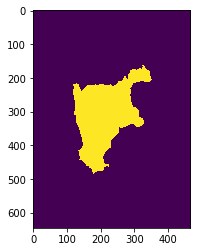

In [137]:
plt.imshow(seg_true)

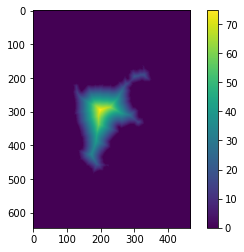

In [139]:
# dst = scipy.ndimage.morphology.distance_transform_edt(seg_true, sampling=pixelsize_mm)
imshow(dst)
plt.colorbar()

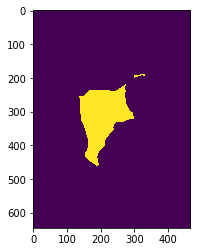

In [140]:

plt.imshow(middle_pixels)

In [98]:

nz

(645, 466)
(65, 47)


(array([190, 230, 230, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240,
        240, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260,
        260, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270,
        270, 270, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280,
        280, 280, 280, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290,
        290, 290, 290, 290, 290, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 310, 310, 310, 310, 310, 310,
        310, 310, 310, 310, 310, 310, 310, 310, 310, 320, 320, 320, 320,
        320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 330, 330,
        330, 330, 330, 330, 330, 330, 330, 330, 330, 330, 340, 340, 340,
        340, 340, 340, 340, 340, 340, 350, 350, 350, 350, 350, 350, 350,
        350, 360, 360, 360, 360, 360, 360, 360, 360, 370, 370, 370, 370,
        370, 370, 370, 380, 380, 380, 380, 380, 390

In [100]:
global_locations = view.coords_view_px_to_glob_px(*nz)

In [154]:

global_locations = get_global_centers_from_annotations(anim, outer_ids[0], pixelsize_mm, tile_size, step)

(645, 466)
(65, 47)


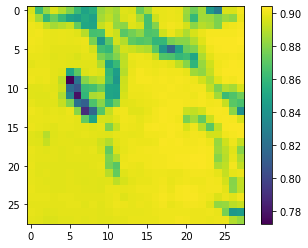

In [267]:
def get_patches_from_locations(anim, global_locations, pixelsize_mm, tile_size, as_gray=True):
    imgs = []
    for i in range(0, len(global_locations[0])):
        im = anim.get_view(
            center=[global_locations[1][i], global_locations[0][i]], 
            size_mm=np.asarray(pixelsize_mm) * (tile_size-0.5), pixelsize_mm=pixelsize_mm
        ).get_region_image(as_gray=as_gray)
        imgs.append(im)
    return imgs
imgs = get_patches_from_locations(anim, global_locations, pixelsize_mm, tile_size)
plt.imshow(imgs[1])
plt.colorbar()

In [325]:
def get_patches_from_annotation(anim, ann_id, pixelsize_mm, tile_size, as_gray=True):
    
    global_locations = get_global_centers_from_annotations(anim, ann_id, pixelsize_mm, tile_size, step)
    print("len global: ", len(global_locations[0]))
    imgs = get_patches_from_locations(anim, global_locations, pixelsize_mm, tile_size)
    return imgs
    

In [180]:
imgs = get_patches_from_annotation(anim, 11, pixelsize_mm, tile_size)


20


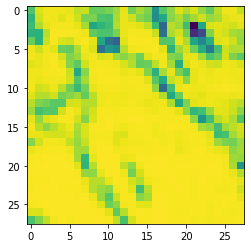

In [271]:
plt.imshow(imgs[1])

# Prepare training set

## Lobulus

In [272]:
imgs = []
y = []


an_ids = anim.select_annotations_by_color("#00FF00")
an_ids

[0, 2, 3, 5, 7, 8]

In [326]:
def create_dataset_from_imagefile(fn):
    """
    Green is used for user input closed curve around central vein. Black closed curve is used for manual segmentation of 
    outline of lobulus. With red closed curve is the septum example delineated.
    """
    imgs = []
    y = []
    anim = scim.AnnotatedImage(fn)
    an_ids = anim.select_annotations_by_color("#00FF00")
    for ann_id in an_ids:
        outer_ids = anim.select_outer_annotations(ann_id, color="#000000")
    #     print("outerids: ", outer_ids)
        # Make samples from lobulus area
        imgs0 = get_patches_from_annotation(anim, outer_ids[0], pixelsize_mm, tile_size)
        y0 = [1] * len(imgs0)
        imgs.extend(imgs0)
        y.extend(y0)
        print("lob len: ", len(imgs0))
        
    
    ann_ids = anim.select_annotations_by_color("#FF0000")

    for ann_id in ann_ids:
        imgs0 = get_patches_from_annotation(anim, ann_id, pixelsize_mm, tile_size)
        y0 = [2] * len(imgs0)
        imgs.extend(imgs0)
        y.extend(y0)
        print("sep len: ", len(imgs0))
    
    return imgs, y
        
    
    

In [273]:
# an_ids_sel1 = anim.select_annotations_by_color("#000000", raise_exception_if_not_found=True)
# type(an_ids_sel1)

for ann_id in an_ids:
    outer_ids = anim.select_outer_annotations(ann_id, color="#000000")
#     print("outerids: ", outer_ids)
    imgs0 = get_patches_from_annotation(anim, outer_ids[0], pixelsize_mm, tile_size)
    y0 = [1] * len(imgs0)
    imgs.extend(imgs0)
    y.extend(y0)


len global:  96
len global:  153
len global:  116
len global:  57
len global:  62
len global:  166


## Septum

In [274]:

an_ids = anim.select_annotations_by_color("#FF0000")

for ann_id in an_ids:
    imgs0 = get_patches_from_annotation(anim, ann_id, pixelsize_mm, tile_size)
    y0 = [2] * len(imgs0)
    imgs.extend(imgs0)
    y.extend(y0)

len global:  65
len global:  140
len global:  7
len global:  40
len global:  181


## Get data from multiple images

In [305]:
fns = [
    io3d.datasets.join_path("medical/orig/Scaffan-analysis/PIG-003_J-18-0165_HE.ndpi", get_root=True),
    io3d.datasets.join_path("medical/orig/Scaffan-analysis/PIG-002_J-18-0091_HE.ndpi", get_root=True),
    io3d.datasets.join_path("medical/orig/Scaffan-analysis/PIG-004_BBJ-004-4_HE_parenchyme.ndpi", get_root=True),
]

In [327]:
imgs = []
yl = []
for fn in fns:
    imgs0, y0 = create_dataset_from_imagefile(fn)
    print(f"lengths: {len(imgs0)} {len(y0)}")
    imgs.extend(imgs0)
    yl.extend(y0)

2019-07-10 08:35:00.032 | DEBUG    | scaffan.image:__init__:166 - Reading file C:\Users\Jirik/data/medical/orig/Scaffan-analysis/PIG-003_J-18-0165_HE.ndpi
2019-07-10 08:35:00.385 | DEBUG    | scaffan.image:__init__:180 - Reading the annotation
2019-07-10 08:35:02.422 | DEBUG    | scaffan.annotation:read_annotations:112 - windows annotation output:b'2019-07-10 08:35:02.200 | DEBUG    | scaffan.annotation:ndpa_to_json:64 - PATH: C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\mingw-w64\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\usr\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\

len global:  96
lob len:  96
len global:  153
lob len:  153
len global:  116
lob len:  116
len global:  57
lob len:  57
len global:  62
lob len:  62
len global:  166
lob len:  166
len global:  65
sep len:  65
len global:  140
sep len:  140
len global:  7
sep len:  7
len global:  40
sep len:  40
len global:  181


2019-07-10 08:36:13.356 | DEBUG    | scaffan.image:__init__:166 - Reading file C:\Users\Jirik/data/medical/orig/Scaffan-analysis/PIG-002_J-18-0091_HE.ndpi


sep len:  181
lengths: 1083 1083


2019-07-10 08:36:13.559 | DEBUG    | scaffan.image:__init__:180 - Reading the annotation
2019-07-10 08:36:16.220 | DEBUG    | scaffan.annotation:read_annotations:112 - windows annotation output:b'2019-07-10 08:36:15.840 | DEBUG    | scaffan.annotation:ndpa_to_json:64 - PATH: C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\mingw-w64\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\usr\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Scripts;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\bin;C:\\Users\\Jirik\\Miniconda3\\condabin;C:\\Users\\Jirik\\AppData\\Local\\cmder\\bin;C:\\Users\\Ji

len global:  118
lob len:  118
len global:  174
lob len:  174
len global:  149
lob len:  149
len global:  31
sep len:  31
len global:  36
sep len:  36
len global:  20


2019-07-10 08:36:55.398 | DEBUG    | scaffan.image:__init__:166 - Reading file C:\Users\Jirik/data/medical/orig/Scaffan-analysis/PIG-004_BBJ-004-4_HE_parenchyme.ndpi


sep len:  20
lengths: 528 528


2019-07-10 08:36:55.585 | DEBUG    | scaffan.image:__init__:180 - Reading the annotation
2019-07-10 08:36:57.978 | DEBUG    | scaffan.annotation:read_annotations:112 - windows annotation output:b'2019-07-10 08:36:57.765 | DEBUG    | scaffan.annotation:ndpa_to_json:64 - PATH: C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\mingw-w64\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\usr\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Scripts;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\bin;C:\\Users\\Jirik\\Miniconda3\\condabin;C:\\Users\\Jirik\\AppData\\Local\\cmder\\bin;C:\\Users\\Ji

len global:  30
lob len:  30
len global:  48
lob len:  48
len global:  36
lob len:  36
len global:  71
lob len:  71
len global:  47
lob len:  47
len global:  13
sep len:  13
len global:  10
sep len:  10
len global:  16
sep len:  16
lengths: 271 271


In [312]:
len(imgs), len(y)

(1882, 1882)

In [303]:
len(y)

1882

In [315]:
X = np.asarray(imgs)
X = X.reshape(*X.shape, 1)
X.shape
y = np.asarray(yl)
np.save("X.npy", X)
np.save("y.npy", y)

In [320]:

hdf5_file.close()

In [324]:
h5py
hdf5_path = "scaffan_dataset.hdf5"
# open a hdf5 file and create earrays
hdf5_file = h5py.File(hdf5_path, mode='w')
# hdf5_file.create_dataset("X", X.shape, X.dtype)
# hdf5_file.create_dataset("y", y.shape, y.dtype)
hdf5_file["X"] = X
hdf5_file["y"] = y

# hdf5_file.create_dataset("test_img", test_shape, np.int8)
hdf5_file.close()

In [ ]:
os.

In [313]:
X.dtype

dtype('float64')

In [323]:
pwd

'C:\\Users\\Jirik\\projects\\scaffan\\devel'